## Big Mart Prediction

### Project Description

The data scientists at BigMart have collected data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### The Hypotheses

### Store Level Hypotheses:

City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
Population Density: Stores located in densely populated areas should have higher sales because of more demand.
Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
Competitors: Stores having similar establishments nearby should have less sales because of more competition.
Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

### Product Level Hypotheses:

Brand: Branded products should have higher sales because of higher trust in the customer.
Packaging: Products with good packaging can attract customers and sell more.
Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
Advertising: Better advertising of products in the store will should higher sales in most cases.

### Description of the Dataset:

We have train and test data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

#Importing requests
import requests

# importing regex
import re

In [3]:
import csv
import time 
from time import sleep
import warnings
warnings.filterwarnings("ignore")

### Load Train and Test data of Dataset


In [4]:
df_train = pd.read_csv(r"E:\datatrained\Bigmart data\bigdatamart_Train.csv")
df_test = pd.read_csv(r"E:\datatrained\Bigmart data\bigdatamart_Test.csv")

In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
print('The training dataset has {} columns.'.format(df_train.shape[1]))
print('The training dataset has {} rows.'.format(df_train.shape[0]))

print('The test dataset has {} rows.'.format(df_test.shape[0]))
print('The test dataset has {} columns.'.format(df_test.shape[1]))

The training dataset has 12 columns.
The training dataset has 8523 rows.
The test dataset has 5681 rows.
The test dataset has 11 columns.


##  Preporcessing

In [9]:
print("Train Data:", df_train.shape)
print("Test Data:", df_test.shape)

Train Data: (8523, 12)
Test Data: (5681, 11)


In [10]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Get Info:

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

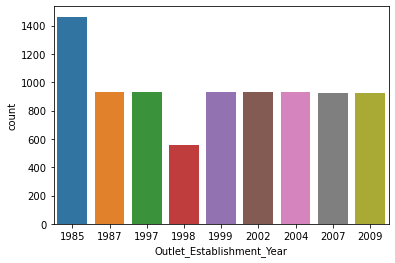

In [16]:
sns.countplot("Outlet_Establishment_Year", data=df_train)

In [17]:
df_train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

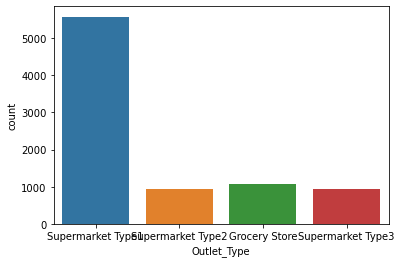

In [18]:
sns.countplot("Outlet_Type", data=df_train)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='count'>

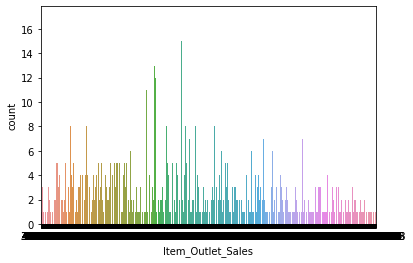

In [19]:
sns.countplot("Item_Outlet_Sales", data=df_train)

### Fill the missing values for both "Traning" and "Test" dataset

In [20]:
# Fill the columns with mean as its continous data

df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace=True)

In [21]:
# Fill the columns with mean as its continous data

df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(), inplace=True)

In [22]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [23]:
# Fill the columns with mode as its categorical data

df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].value_counts().index[0], inplace=True)

### Let's check is there Null values:

In [24]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<AxesSubplot:>

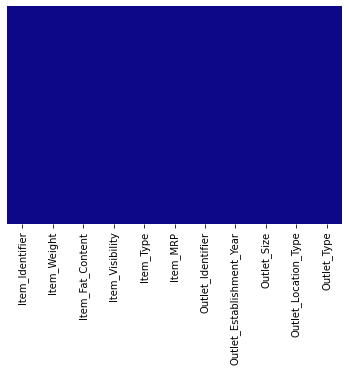

In [27]:
# test/train data set: 

sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap="plasma")

<AxesSubplot:>

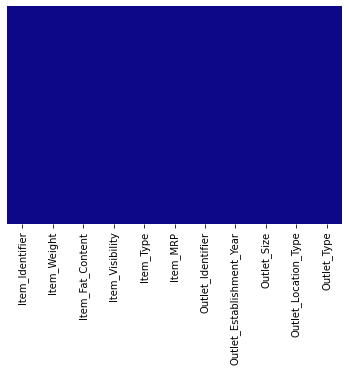

In [28]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap="plasma")

In [29]:
# Total columns names :
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Encoding DataSet:

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode the training dataset

df_train.Item_Identifier = encoder.fit_transform(df_train.Item_Identifier)
df_train.Item_Fat_Content = encoder.fit_transform(df_train.Item_Fat_Content)
df_train.Item_Type = encoder.fit_transform(df_train.Item_Type)
df_train.Outlet_Identifier = encoder.fit_transform(df_train.Outlet_Identifier)
df_train.Outlet_Size = encoder.fit_transform(df_train.Outlet_Size)
df_train.Outlet_Location_Type = encoder.fit_transform(df_train.Outlet_Location_Type)
df_train.Outlet_Type = encoder.fit_transform(df_train.Outlet_Type)

In [31]:
# Encode the test dataset

df_test.Item_Identifier = encoder.fit_transform(df_test.Item_Identifier)
df_test.Item_Fat_Content = encoder.fit_transform(df_test.Item_Fat_Content)
df_test.Item_Type = encoder.fit_transform(df_test.Item_Type)
df_test.Outlet_Identifier = encoder.fit_transform(df_test.Outlet_Identifier)
df_test.Outlet_Size = encoder.fit_transform(df_test.Outlet_Size)
df_test.Outlet_Location_Type = encoder.fit_transform(df_test.Outlet_Location_Type)
df_test.Outlet_Type = encoder.fit_transform(df_test.Outlet_Type)

In [32]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [33]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


#### Here we find that there is no missing data :

In [34]:
df_train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.736360,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.989181,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000,13086.964800


In [35]:
df_test.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.695633,1.368773,0.065684,7.233410,141.023273,4.722760,1997.828903,1.170921,1.112832,1.201373
std,445.525926,4.245189,0.641085,0.051252,4.219057,61.809091,2.837201,8.372256,0.600328,0.812824,0.796740
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,382.000000,9.195000,1.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,771.000000,12.695633,1.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1160.000000,15.850000,2.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1542.000000,21.350000,4.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


####  Now focus on "Item_Weight", "Item_Visibility" and "Item_MRP"


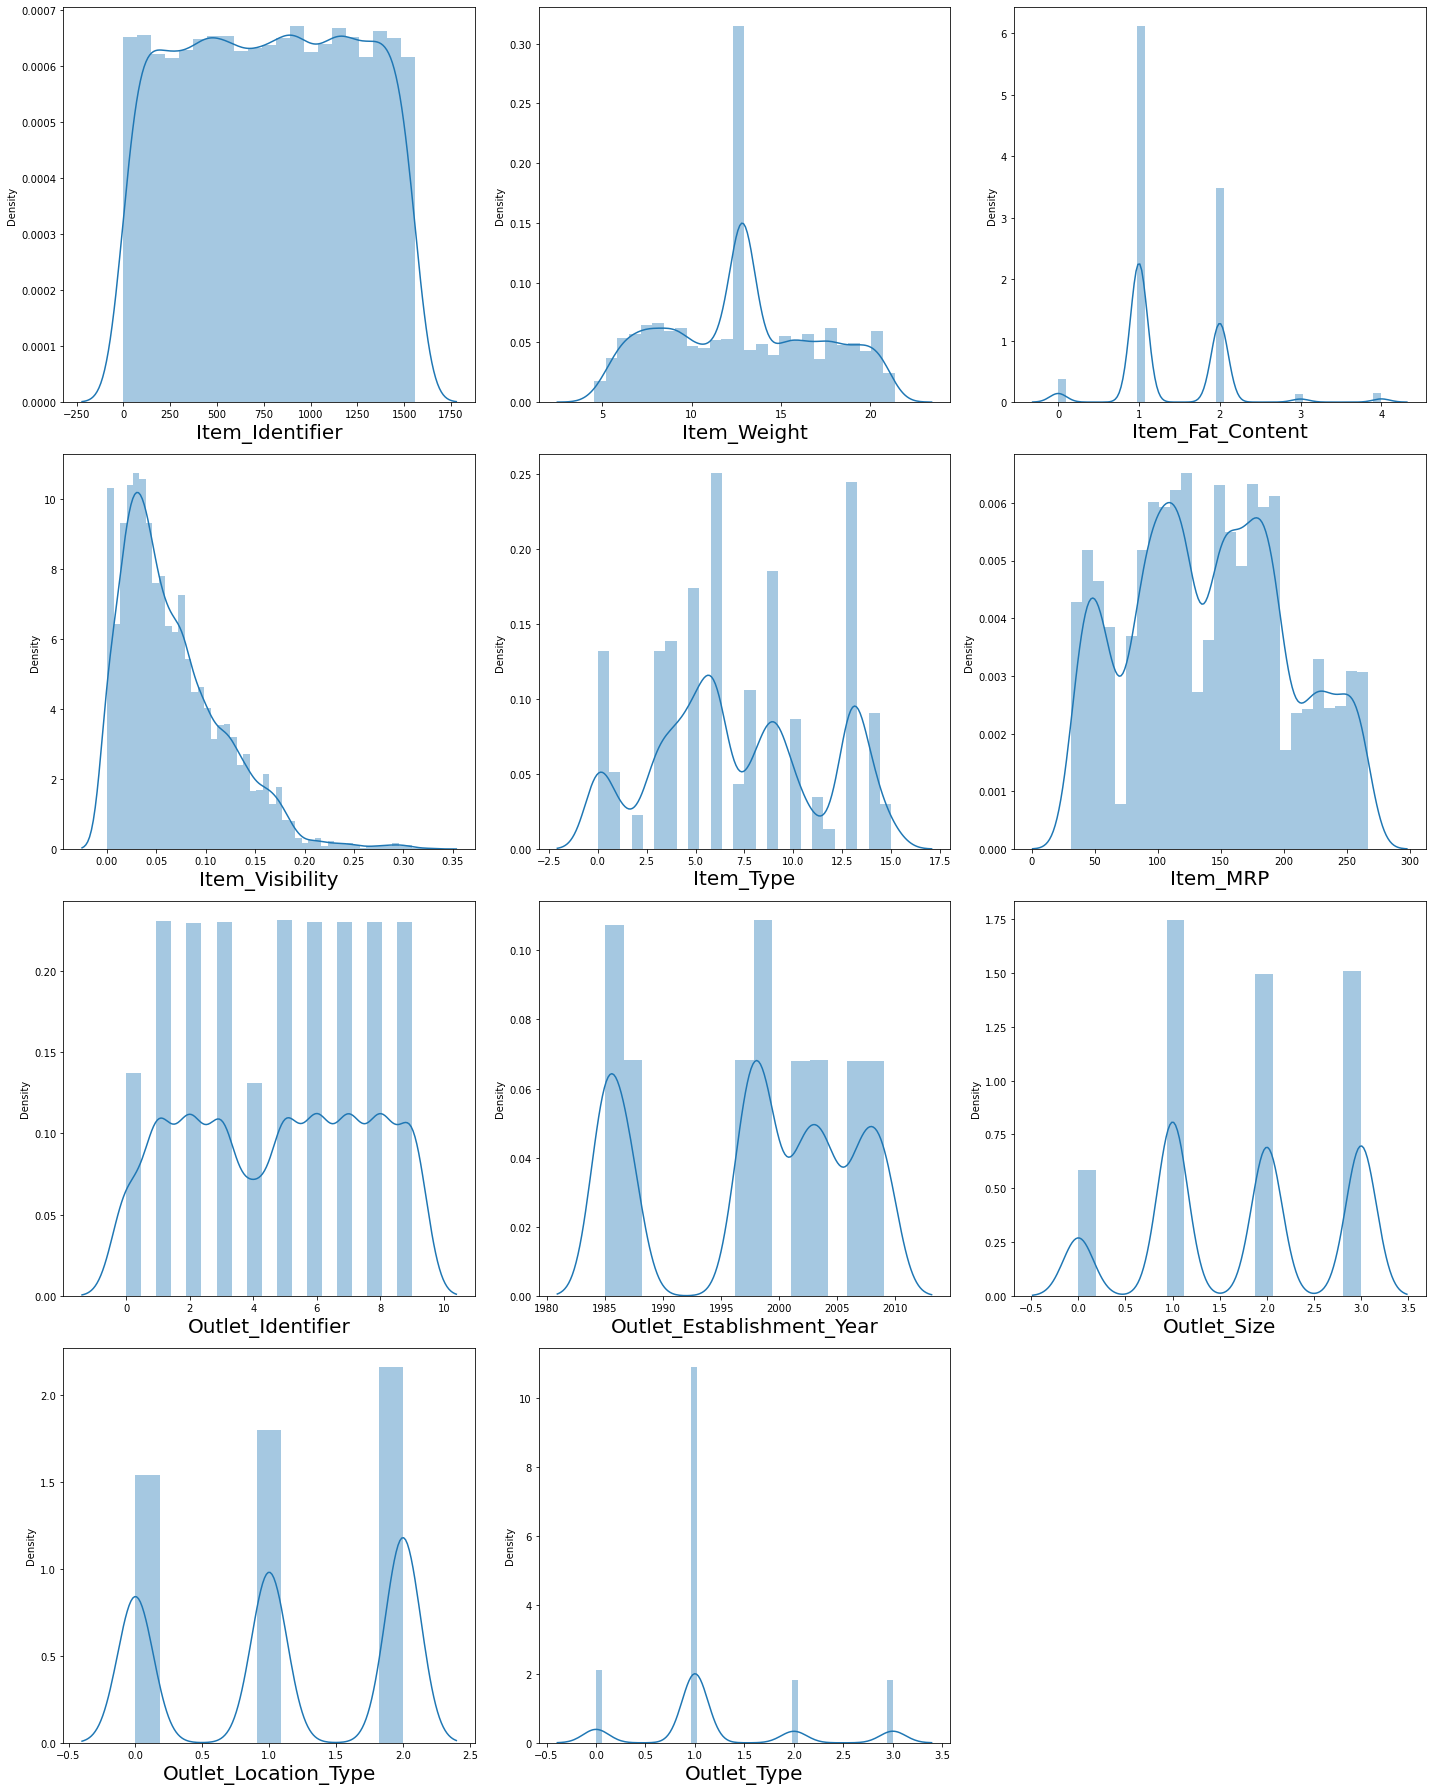

In [37]:
#let us now see the distribution of the "Train dataset"

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df_train:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

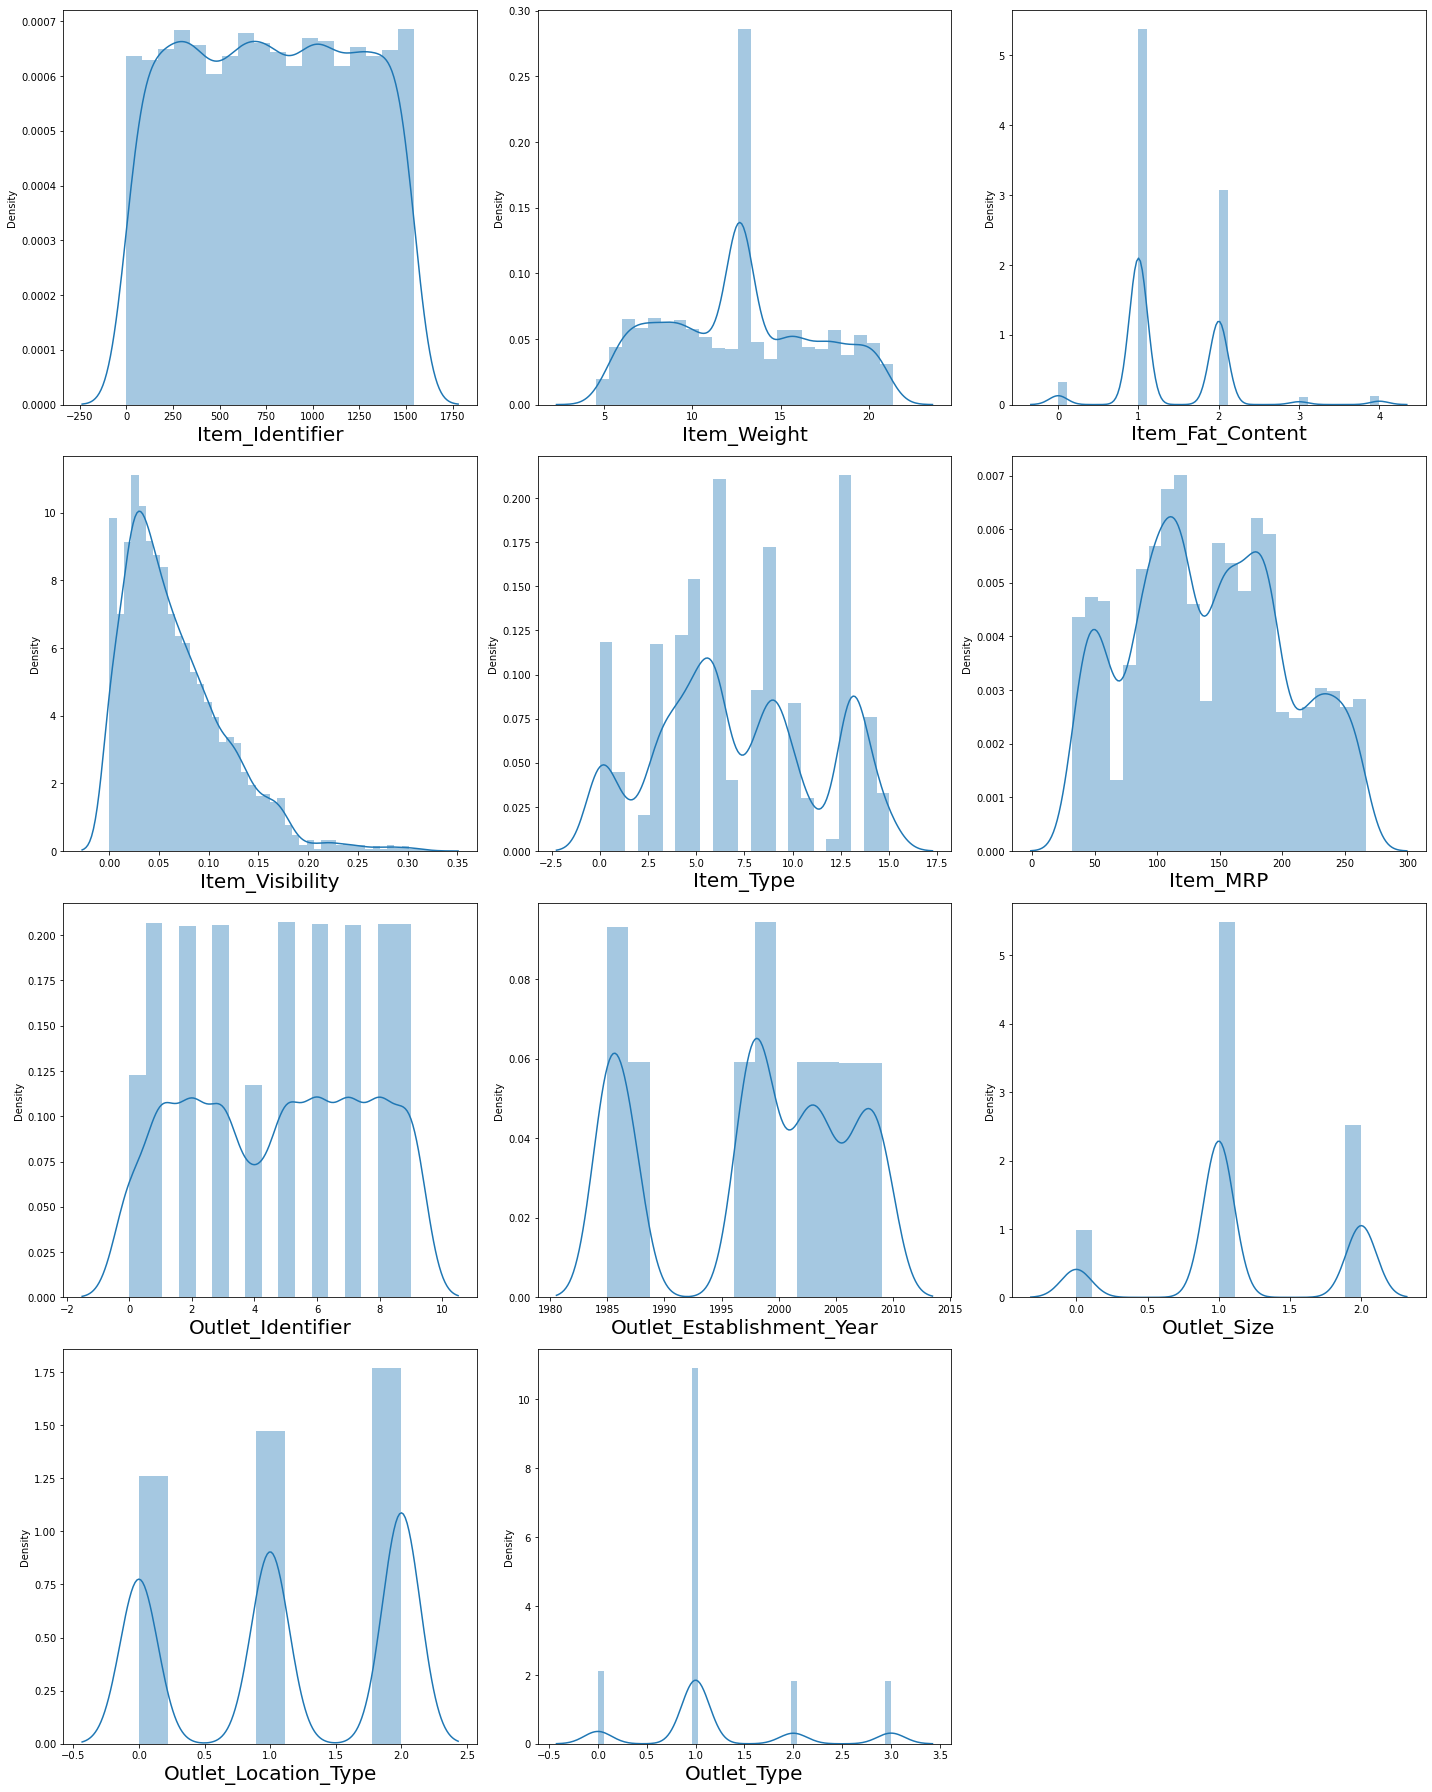

In [41]:
# let us now see the distribution of the "Test dataset"

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df_test:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df_test[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Apply Z-score to identify and remove outliers:

In [42]:
from scipy.stats import zscore


# z_score on train dataset

z_score = zscore(df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP']])
abs_zscore = np.abs(z_score)
filtering_entry = (abs_zscore < 3).all(axis=1)
df_train = df_train[filtering_entry]



# z_score on test dataset

z_score = zscore(df_test[['Item_Weight', 'Item_Visibility', 'Item_MRP']])
abs_zscore = np.abs(z_score)
filtering_entry = (abs_zscore < 3).all(axis=1)
df_test = df_test[filtering_entry]

In [43]:
df_train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.00000,8428.000000
mean,779.993355,12.861218,1.369127,0.063905,7.227337,140.996015,4.750356,1997.911723,1.728405,1.115449,1.21476,2202.021401
std,449.735962,4.238141,0.644522,0.047302,4.207285,62.287713,2.832887,8.356697,0.990480,0.810126,0.79060,1704.631341
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.00000,33.290000
25%,395.000000,9.300000,1.000000,0.026861,4.000000,93.802150,2.000000,1987.000000,1.000000,0.000000,1.00000,862.876800
50%,783.000000,12.857645,1.000000,0.053293,6.000000,142.915400,5.000000,1999.000000,2.000000,1.000000,1.00000,1816.968200
75%,1168.000000,16.100000,2.000000,0.093160,10.000000,185.708200,7.000000,2004.000000,3.000000,2.000000,1.00000,3115.944000
max,1558.000000,21.350000,4.000000,0.220226,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.00000,13086.964800


In [44]:
df_test.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,774.142500,12.701017,1.366786,0.062899,7.240714,141.126934,4.760357,1997.926250,1.165714,1.115357,1.218750
std,446.008167,4.261717,0.638781,0.045919,4.223010,61.771211,2.830081,8.356738,0.600086,0.809556,0.789174
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,383.000000,9.195000,1.000000,0.026848,4.000000,94.446200,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,772.000000,12.695633,1.000000,0.053348,6.000000,141.531200,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1160.000000,15.850000,2.000000,0.091380,10.000000,186.098350,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1542.000000,21.350000,4.000000,0.216763,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


### Correlation 

In [45]:
corr_matrix = df_train.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.573491
Outlet_Type                  0.390817
Outlet_Identifier            0.153668
Outlet_Location_Type         0.087474
Item_Type                    0.017142
Item_Weight                  0.010575
Item_Fat_Content             0.010389
Item_Identifier              0.002034
Outlet_Establishment_Year   -0.060149
Item_Visibility             -0.090907
Outlet_Size                 -0.165545
Name: Item_Outlet_Sales, dtype: float64

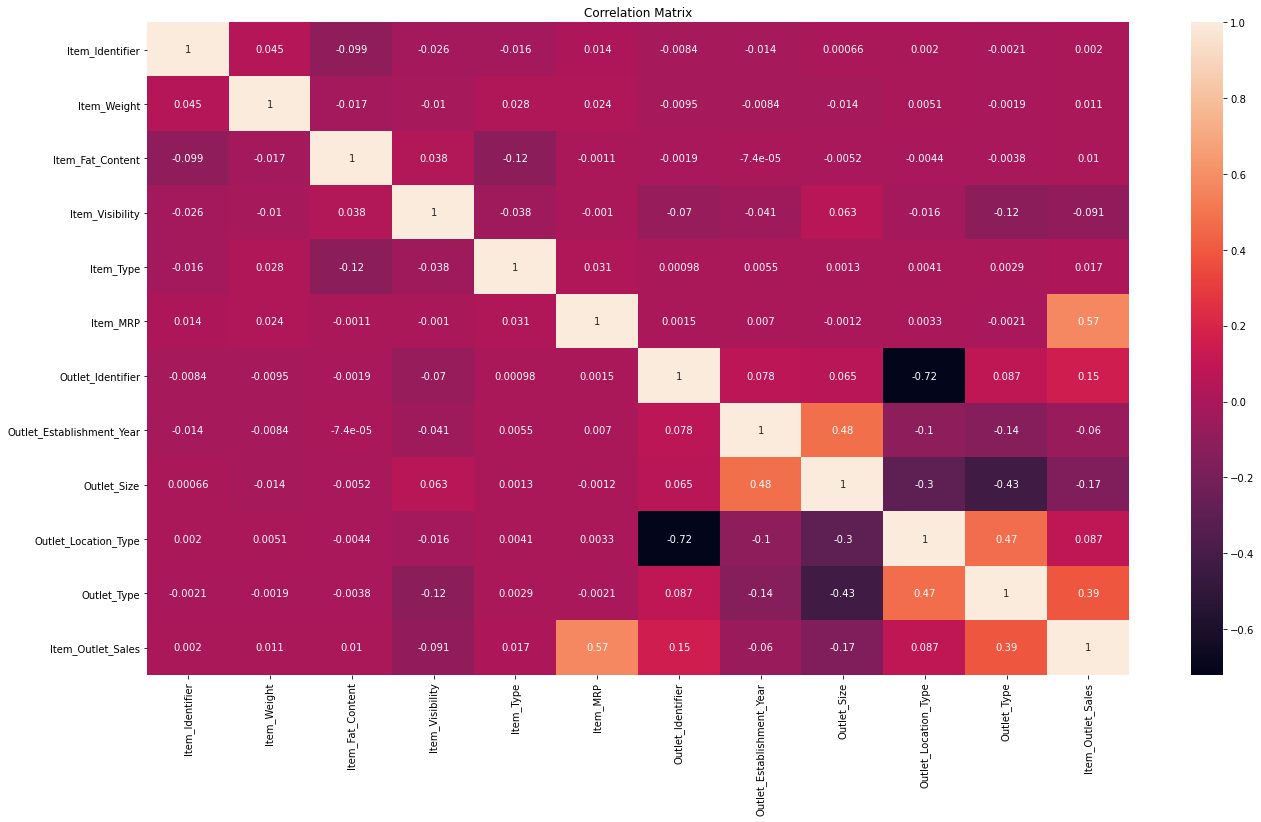

In [46]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [47]:
#spliting data:

# train dataset with featurs only
x = df_train.drop(columns = ["Item_Outlet_Sales"], axis=1)

y = df_train["Item_Outlet_Sales"]

# test dataset with featurs only
x1 = df_test

### skewness of data

In [48]:
x.skew()

Item_Identifier             -0.008502
Item_Weight                  0.089907
Item_Fat_Content             1.010133
Item_Visibility              0.795956
Item_Type                    0.100953
Item_MRP                     0.128945
Outlet_Identifier           -0.067357
Outlet_Establishment_Year   -0.409186
Outlet_Size                 -0.119227
Outlet_Location_Type        -0.213304
Outlet_Type                  0.947057
dtype: float64

In [49]:
x1.skew()

Item_Identifier             -0.001969
Item_Weight                  0.140901
Item_Fat_Content             0.996518
Item_Visibility              0.787861
Item_Type                    0.091394
Item_MRP                     0.133061
Outlet_Identifier           -0.069734
Outlet_Establishment_Year   -0.411451
Outlet_Size                 -0.082542
Outlet_Location_Type        -0.212992
Outlet_Type                  0.953152
dtype: float64

In [50]:
# Storing:
features = ['Item_Visibility', 'Item_MRP']

###  Scale the Data using StandardScaler 

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled1 = scaler.fit_transform(x1)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)


##  Create output from regression models:

In [59]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  1067.9129243969949
Mean Squared Error (MSE):  2371127.7317044414
Root Mean Squared Error (RMSE):  1539.8466585035153


In [60]:
# Random-Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9372985642159283
Mean Absolute Error (MAE):  802.7030096567813
Mean Squared Error (MSE):  1288594.6128188155
Root Mean Squared Error (RMSE):  1135.1628133526995


In [62]:
# K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.6689914363140503
Mean Absolute Error (MAE):  854.5817060023727
Mean Squared Error (MSE):  1439243.8649238485
Root Mean Squared Error (RMSE):  1199.6849023488828


In [70]:
# Hist Gradient Boosting Regressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist_grad = HistGradientBoostingRegressor()
hist_grad.fit(x_train,y_train)

y_pred = hist_grad.predict(x_test)

print("Adjusted R2 squared : ",hist_grad.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7451877015436399
Mean Absolute Error (MAE):  796.0561037517072
Mean Squared Error (MSE):  1265261.286148732
Root Mean Squared Error (RMSE):  1124.8383377840266


### Cross validation to check if its overfitting


In [71]:
from sklearn.model_selection import cross_val_score

In [73]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())


scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

scr = cross_val_score(hist_grad, x, y, cv=5)
print("Cross Validation score of HistGradientBoostingRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: 0.13354344817386743
Cross Validation score of RandomForestRegressor model is: 0.5466579368063144
Cross Validation score of KNeighborsRegressor model is: 0.20270107465277007
Cross Validation score of HistGradientBoostingRegressor model is: 0.5632727706212004


###  Hyper Tuning Parameter 


In [74]:
parameters = {"loss":["least_squares", "least_absolute_deviation", "poisson"],
              "max_iter": [100,150,200],
              "max_bins": [4,8,9],
              "max_leaf_nodes":[2,3,4],
              "learning_rate":[0.1,0.2,0.3],
              "validation_fraction":[0.1,0.2,0.3]
             }

In [75]:
# Using GridSearchCV:

from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(HistGradientBoostingRegressor(), parameters, cv=5)

In [78]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['least_squares', 'least_absolute_deviation',
                                  'poisson'],
                         'max_bins': [4, 8, 9], 'max_iter': [100, 150, 200],
                         'max_leaf_nodes': [2, 3, 4],
                         'validation_fraction': [0.1, 0.2, 0.3]})

In [79]:
GCV.best_params_

{'learning_rate': 0.1,
 'loss': 'poisson',
 'max_bins': 9,
 'max_iter': 200,
 'max_leaf_nodes': 2,
 'validation_fraction': 0.1}

## Rebuild the model :

In [80]:
mod_bigmart = HistGradientBoostingRegressor(learning_rate= 0.1, loss= "least_squares", max_bins= 9, 
                                            max_iter= 100, max_leaf_nodes= 3, validation_fraction= 0.1)

mod_bigmart.fit(x_train,y_train)
pred = mod_bigmart.predict(x_test)
pred

array([5528.62278807,  740.18641294, 2325.2282594 , ..., 2633.5751699 ,
       1174.07861503, 1195.44420348])

##  Save model (using joblib)


In [83]:
import joblib
joblib.dump(mod_bigmart,"BigMart_Dataset.pkl")

['BigMart_Dataset.pkl']

In [84]:
# prediction of new model

model = joblib.load("BigMart_Dataset.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,5528.622788
1,740.186413
2,2325.228259
3,2720.421377
4,484.194414
...,...
2524,1586.745829
2525,740.186413
2526,2633.575170
2527,1174.078615


In [85]:
prediction.to_csv("Predicted_Sales_Data.csv", index=False)